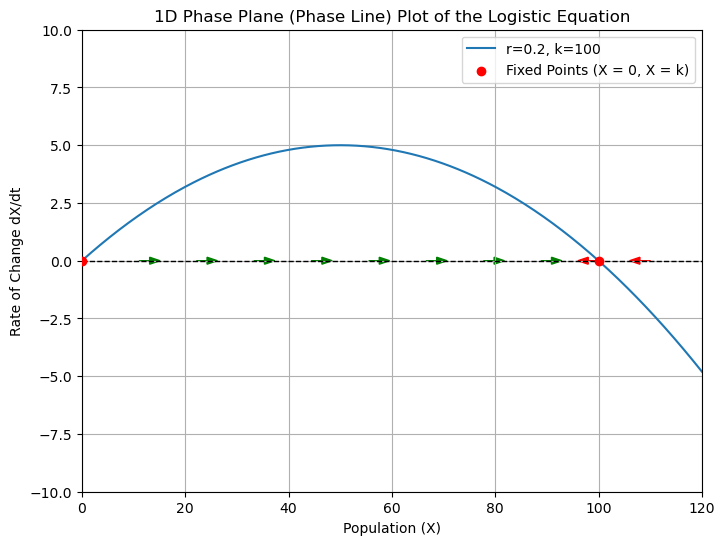

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic growth equation
r = 0.2  # Growth rate
k = 100  # Carrying capacity

# Define the logistic differential equation
def dX_dt(X, r, k):
    return r * X * (1 - X / k)

# Generate X values and compute dX/dt
X_values = np.linspace(0, 120, 400)  # Cover a range of X values beyond carrying capacity
dX_values = dX_dt(X_values, r, k)

# Create the phase plane plot
plt.figure(figsize=(8, 6))

# Plot the rate of change dX/dt as a function of X
plt.plot(X_values, dX_values, label=f"r={r}, k={k}")

# Mark the x-axis for zero crossing (where dX/dt = 0)
plt.axhline(0, color='black',linewidth=1, linestyle='--')

# Indicate the fixed points
plt.scatter([0, k], [0, 0], color='red', zorder=5, label='Fixed Points (X = 0, X = k)')

# Add arrows indicating flow direction
for x in np.linspace(0, k, 10):
    if dX_dt(x, r, k) > 0:
        plt.arrow(x, 0, 2, 0, head_width=0.3, head_length=2, fc='green', ec='green')
    else:
        plt.arrow(x, 0, -2, 0, head_width=0.3, head_length=2, fc='red', ec='red')

plt.arrow(k + 10, 0, -2, 0, head_width=0.3, head_length=2, fc='red', ec='red')

# Customize the plot
plt.xlabel('Population (X)')
plt.ylabel('Rate of Change dX/dt')
plt.title('1D Phase Plane (Phase Line) Plot of the Logistic Equation')
plt.legend()
plt.grid(True)
plt.xlim([0, 120])
plt.ylim([-10, 10])

plt.show()


To update the function $X' = rX\left(1 - \frac{X}{k}\right)$ to account for two different types of $X$ with distinct values of the growth rate parameter $r$, we modify the equation to reflect a 50:50 proportion of the two subpopulations. Each subpopulation would have its own growth rate but would still share the same carrying capacity $k$.

Let’s denote the two subpopulations as $X_1$ and $X_2$, with:

$r_1 = 0.1$ for $X_1$,
$r_2 = 0.2$ for $X_2$,
and $X = X_1 + X_2$, the total population (where both $X_1$ and $X_2$ constitute 50% each of the total population).

Each subpopulation will follow its own logistic growth dynamics but will interact within the same overall carrying capacity $k$. The equation for each subpopulation will be:

$$X_1' = r_1 X_1 \left( 1 - \frac{X_1 + X_2}{k} \right)$$
$$X_2' = r_2 X_2 \left( 1 - \frac{X_1 + X_2}{k} \right)$$

Since the proportions are 50:50, we can assume:

$$X_1 = \frac{1}{2} X$$
and
$$X_2 = \frac{1}{2} X$$

Now, we can substitute these into the equations for $X_1'$ and $X_2'$ and then average the rate of change across the two subpopulations:

### New Combined Equation:
The new total rate of change, $X'$, would be the average of the rates of change for $X_1$ and $X_2$, weighted according to their proportions:

$$X' = \frac{1}{2} \left( r_1 X_1 \left( 1 - \frac{X_1 + X_2}{k} \right) \right) + \frac{1}{2} \left( r_2 X_2 \left( 1 - \frac{X_1 + X_2}{k} \right) \right)$$

Since $X_1 = X_2 = \frac{X}{2}$, we can simplify:

$$X' = r_1 \frac{X}{2} \left( 1 - \frac{X}{k} \right) + r_2 \frac{X}{2} \left( 1 - \frac{X}{k} \right)$$

$$X' = \frac{X}{2} \left( r_1 \left( 1 - \frac{X}{k} \right) + r_2 \left( 1 - \frac{X}{k} \right) \right)$$

$$X' = \frac{X}{2} \left( (r_1 + r_2) \left( 1 - \frac{X}{k} \right) \right)$$

Now substitute $r_1 = 0.1$ and $r_2 = 0.2$:

$$X' = \frac{X}{2} \left( 0.3 \left( 1 - \frac{X}{k} \right) \right)$$

$$X' = 0.15 X \left( 1 - \frac{X}{k} \right)$$

Thus, the new differential equation accounting for two subpopulations with different growth rates is:

$$X' = 0.15 X \left( 1 - \frac{X}{k} \right)$$


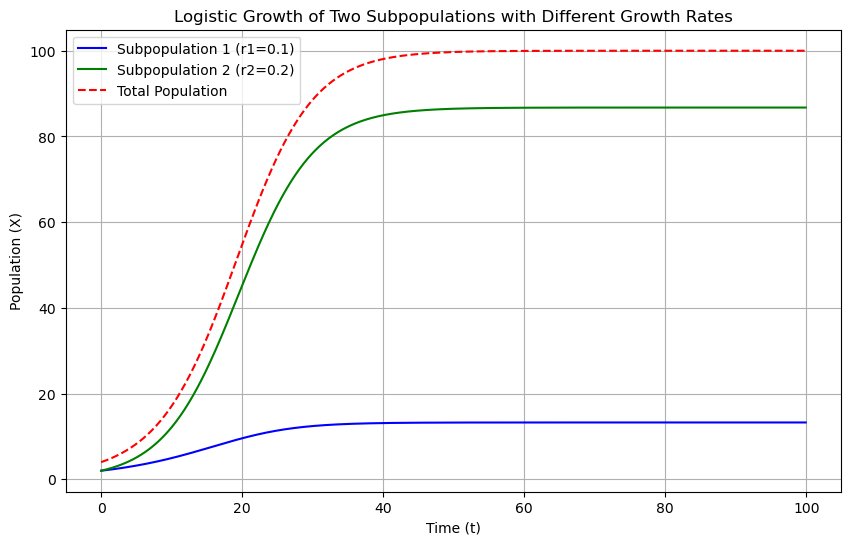

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic growth equation
r1 = 0.1  # Growth rate for first subpopulation
r2 = 0.2  # Growth rate for second subpopulation
k = 100   # Carrying capacity (shared between both subpopulations)
X1_0 = 2  # Initial population of first subpopulation (50% of total)
X2_0 = 2  # Initial population of second subpopulation (50% of total)

# Time settings
t_min = 0
t_max = 100
dt = 0.1
t_values = np.arange(t_min, t_max, dt)

# Define the logistic differential equations for each subpopulation
def dX1_dt(X1, X2, r1, k):
    return r1 * X1 * (1 - (X1 + X2) / k)

def dX2_dt(X1, X2, r2, k):
    return r2 * X2 * (1 - (X1 + X2) / k)

# Solve the system of equations using Euler's method
X1_values = [X1_0]  # Start with the initial condition for subpopulation 1
X2_values = [X2_0]  # Start with the initial condition for subpopulation 2

for t in t_values[1:]:
    X1_prev = X1_values[-1]
    X2_prev = X2_values[-1]
    
    # Update populations using Euler's method
    X1_next = X1_prev + dX1_dt(X1_prev, X2_prev, r1, k) * dt
    X2_next = X2_prev + dX2_dt(X1_prev, X2_prev, r2, k) * dt
    
    X1_values.append(X1_next)
    X2_values.append(X2_next)

# Convert the lists to numpy arrays for easier plotting
X1_values = np.array(X1_values)
X2_values = np.array(X2_values)
total_population = X1_values + X2_values

# Create the plot
plt.figure(figsize=(10, 6))

# Plot subpopulation 1
plt.plot(t_values, X1_values, label=f'Subpopulation 1 (r1={r1})', color='blue')

# Plot subpopulation 2
plt.plot(t_values, X2_values, label=f'Subpopulation 2 (r2={r2})', color='green')

# Plot total population
plt.plot(t_values, total_population, label='Total Population', color='red', linestyle='--')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('Population (X)')
plt.title('Logistic Growth of Two Subpopulations with Different Growth Rates')
plt.legend()
plt.grid(True)

plt.show()


## Inverse Logistic Growth

$$dX/dt = -rX(1+\frac{X}{k}$$

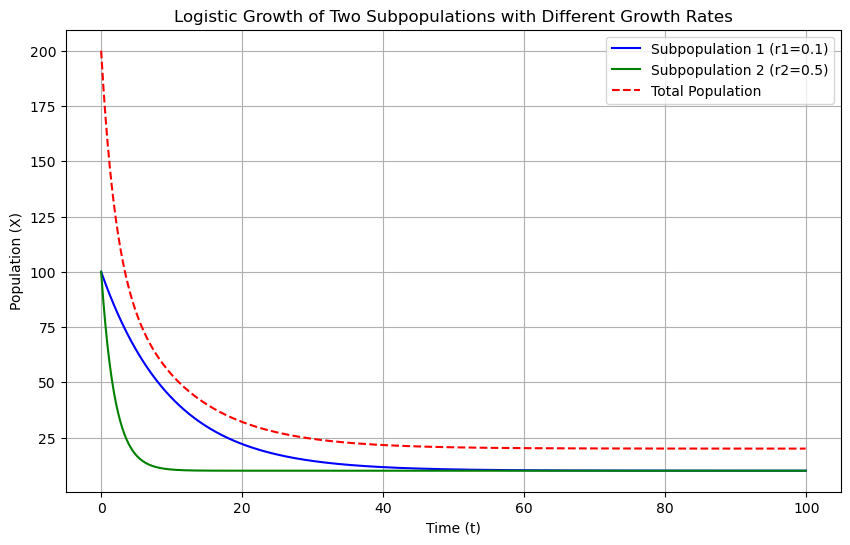

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic growth equation
r1 = 0.1  # Growth rate for first subpopulation
r2 = 0.5  # Growth rate for second subpopulation
X_eq = 10   # Carrying capacity (shared between both subpopulations)
X1_0 = 100  # Initial population of first subpopulation (50% of total)
X2_0 = 100  # Initial population of second subpopulation (50% of total)

# Time settings
t_min = 0
t_max = 100
dt = 0.1
t_values = np.arange(t_min, t_max, dt)

# Define the logistic differential equations for each subpopulation
def dX1_dt(X1, X2, r1, k):
    return -r1 * (X1 - X_eq) 

def dX2_dt(X1, X2, r2, k):
    return -r2 * (X2 - X_eq)

# Solve the system of equations using Euler's method
X1_values = [X1_0]  # Start with the initial condition for subpopulation 1
X2_values = [X2_0]  # Start with the initial condition for subpopulation 2

for t in t_values[1:]:
    X1_prev = X1_values[-1]
    X2_prev = X2_values[-1]
    
    # Update populations using Euler's method
    X1_next = X1_prev + dX1_dt(X1_prev, X2_prev, r1, k) * dt
    X2_next = X2_prev + dX2_dt(X1_prev, X2_prev, r2, k) * dt
    
    X1_values.append(X1_next)
    X2_values.append(X2_next)

# Convert the lists to numpy arrays for easier plotting
X1_values = np.array(X1_values)
X2_values = np.array(X2_values)
total_population = X1_values + X2_values

# Create the plot
plt.figure(figsize=(10, 6))

# Plot subpopulation 1
plt.plot(t_values, X1_values, label=f'Subpopulation 1 (r1={r1})', color='blue')

# Plot subpopulation 2
plt.plot(t_values, X2_values, label=f'Subpopulation 2 (r2={r2})', color='green')

# Plot total population
plt.plot(t_values, total_population, label='Total Population', color='red', linestyle='--')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('Population (X)')
plt.title('Logistic Growth of Two Subpopulations with Different Growth Rates')
plt.legend()
plt.grid(True)

plt.show()


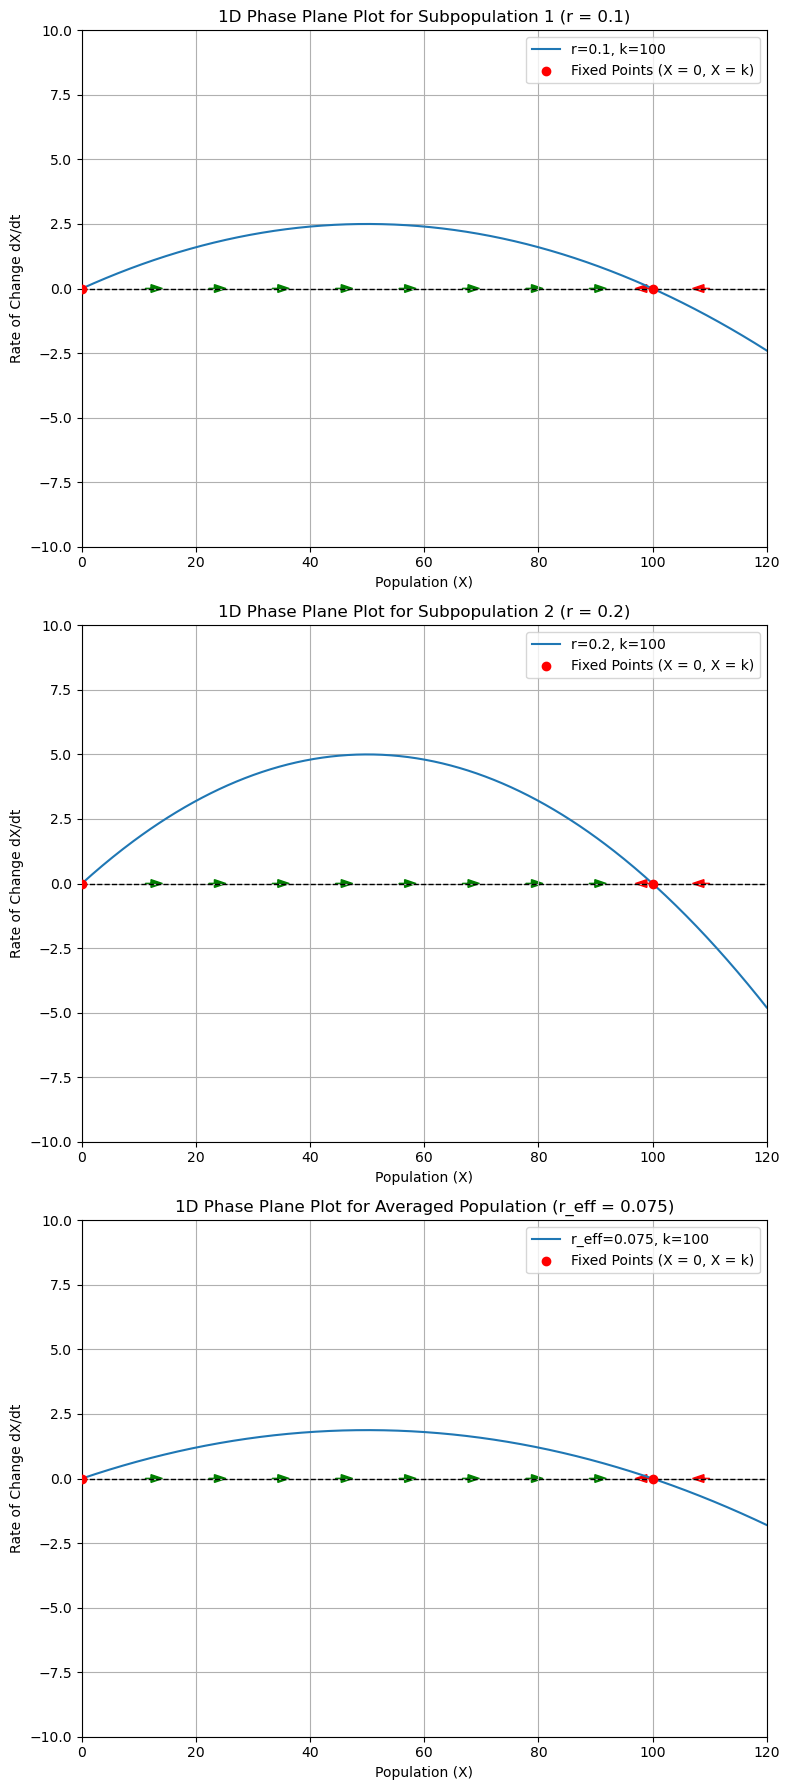

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic growth equations
r1 = 0.1  # Growth rate for subpopulation 1
r2 = 0.2  # Growth rate for subpopulation 2
r_eff = 0.075  # Effective growth rate (average of r1 and r2)
k = 100  # Carrying capacity

# Define the logistic differential equation
def dX_dt(X, r, k):
    return r * X * (1 - X / k)

# Generate X values and compute dX/dt for each case
X_values = np.linspace(0, 120, 400)  # Cover a range of X values beyond carrying capacity
dX_values_r1 = dX_dt(X_values, r1, k)
dX_values_r2 = dX_dt(X_values, r2, k)
dX_values_r_eff = dX_dt(X_values, r_eff, k)

# Create the figure for plotting three phase plane plots
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

# Plot for r1 = 0.1 (Subpopulation 1)
ax[0].plot(X_values, dX_values_r1, label=f"r={r1}, k={k}")
ax[0].axhline(0, color='black', linewidth=1, linestyle='--')  # Mark zero crossing
ax[0].scatter([0, k], [0, 0], color='red', zorder=5, label='Fixed Points (X = 0, X = k)')
for x in np.linspace(0, k, 10):
    if dX_dt(x, r1, k) > 0:
        ax[0].arrow(x, 0, 1, 0, head_width=0.3, head_length=2, fc='green', ec='green')
    else:
        ax[0].arrow(x, 0, -1, 0, head_width=0.3, head_length=2, fc='red', ec='red')
ax[0].arrow(k + 10, 0, -1, 0, head_width=0.3, head_length=2, fc='red', ec='red')
ax[0].set_xlabel('Population (X)')
ax[0].set_ylabel('Rate of Change dX/dt')
ax[0].set_title('1D Phase Plane Plot for Subpopulation 1 (r = 0.1)')
ax[0].legend()
ax[0].grid(True)
ax[0].set_xlim([0, 120])
ax[0].set_ylim([-10, 10])

# Plot for r2 = 0.2 (Subpopulation 2)
ax[1].plot(X_values, dX_values_r2, label=f"r={r2}, k={k}")
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')  # Mark zero crossing
ax[1].scatter([0, k], [0, 0], color='red', zorder=5, label='Fixed Points (X = 0, X = k)')
for x in np.linspace(0, k, 10):
    if dX_dt(x, r2, k) > 0:
        ax[1].arrow(x, 0, 1, 0, head_width=0.3, head_length=2, fc='green', ec='green')
    else:
        ax[1].arrow(x, 0, -1, 0, head_width=0.3, head_length=2, fc='red', ec='red')
ax[1].arrow(k + 10, 0, -1, 0, head_width=0.3, head_length=2, fc='red', ec='red')
ax[1].set_xlabel('Population (X)')
ax[1].set_ylabel('Rate of Change dX/dt')
ax[1].set_title('1D Phase Plane Plot for Subpopulation 2 (r = 0.2)')
ax[1].legend()
ax[1].grid(True)
ax[1].set_xlim([0, 120])
ax[1].set_ylim([-10, 10])

# Plot for r_eff = 0.075 (Averaged Population)
ax[2].plot(X_values, dX_values_r_eff, label=f"r_eff={r_eff}, k={k}")
ax[2].axhline(0, color='black', linewidth=1, linestyle='--')  # Mark zero crossing
ax[2].scatter([0, k], [0, 0], color='red', zorder=5, label='Fixed Points (X = 0, X = k)')
for x in np.linspace(0, k, 10):
    if dX_dt(x, r_eff, k) > 0:
        ax[2].arrow(x, 0, 1, 0, head_width=0.3, head_length=2, fc='green', ec='green')
    else:
        ax[2].arrow(x, 0, -1, 0, head_width=0.3, head_length=2, fc='red', ec='red')
ax[2].arrow(k + 10, 0, -1, 0, head_width=0.3, head_length=2, fc='red', ec='red')
ax[2].set_xlabel('Population (X)')
ax[2].set_ylabel('Rate of Change dX/dt')
ax[2].set_title('1D Phase Plane Plot for Averaged Population (r_eff = 0.075)')
ax[2].legend()
ax[2].grid(True)
ax[2].set_xlim([0, 120])
ax[2].set_ylim([-10, 10])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
